In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("thyroid_dataset.csv")

In [5]:
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0,1,0,0,0,0,0,0,0,...,0,1,0,0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,49.0,3.0,5.0,116.0,4.0,o


In [6]:
X = df.drop("Outlier_label", axis=1)
y = df["Outlier_label"]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[-2.34449113e-02,  1.50050924e+00, -3.94405319e-01, ...,
        -1.40951598e+00, -3.74590514e-02, -1.25859776e+00],
       [ 2.40791602e-03, -6.66440415e-01, -3.94405319e-01, ...,
        -6.57814578e-01,  2.27969782e-01, -5.68029663e-01],
       [-7.03031607e-02, -6.66440415e-01,  2.53546276e+00, ...,
        -7.17159426e-01,  4.34414431e-01, -7.13412420e-01],
       ...,
       [-2.99081181e-02, -6.66440415e-01, -3.94405319e-01, ...,
         6.08208844e-01,  7.58827450e-01,  2.49748343e-01],
       [ 7.25532113e-03,  1.50050924e+00, -3.94405319e-01, ...,
         2.32358141e-01, -7.96695877e-03,  4.67822478e-01],
       [-2.18291096e-02, -6.66440415e-01, -3.94405319e-01, ...,
        -2.48028670e-02,  8.05093192e-02,  1.22538431e-01]])

In [13]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=200, contamination=0.036, random_state=42)

In [14]:
labels = clf.fit_predict(X_scaled)

In [15]:
labels

array([ 1,  1, -1, ...,  1,  1,  1])

In [16]:
# Visualize
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Text(0, 0.5, 'PC2')

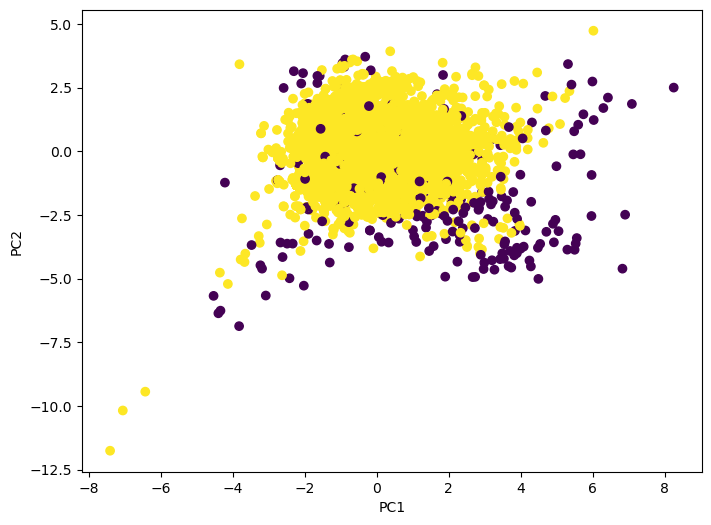

In [17]:
plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [18]:
import numpy as np

n_outliers = np.sum(labels == -1)
n_normal = np.sum(labels == 1)

print("outlier = ", n_outliers)
print("normal = ", n_normal)

outlier =  249
normal =  6667
